In [1]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import csv
import sys
sys.path.append("..")

from Code.VQLSSVM import VQLSSVM
from Code.Utils import prepareDataset

np.set_printoptions(precision=4, suppress=True)

In [2]:
shots: int = 10000
gamma: float = 0.01 # regularization parameter
subsetSize: int = 7
classToFilterOut: int = 2

In [3]:
xTrain, xTest, yTrain, yTest = prepareDataset(normalizeValues=True, dataset="iris")
print(xTrain)

[[ 0.3333 -0.3333  0.4634  0.4118]
 [-0.4074  0.5    -0.7073 -0.8824]
 [-0.1852  0.1667 -0.7561 -0.6471]
 [ 0.5556 -0.25    0.6098  0.4118]
 [-0.7037  0.     -0.7073 -0.8824]
 [-0.1852  0.5833 -0.8537 -0.6471]
 [-0.6296 -0.1667 -0.8049 -1.    ]]


# VQLS-LSSVM state vectors

Condition number of the matrix:  1597.4885322547573
LS-SVM Matrix:
 [[  0.       1.       1.       1.       1.       1.       1.       1.    ]
 [  1.     100.6065  -0.9936  -0.7341   0.7206  -0.9257  -0.9182  -0.9391]
 [  1.      -0.9936 101.6948   1.2645  -1.146    1.5655   1.5419   1.6248]
 [  1.      -0.7341   1.2645 101.0524  -0.872    1.2361   1.1957   1.3444]
 [  1.       0.7206  -1.146   -0.872  100.9125  -1.1856  -1.0357  -1.2107]
 [  1.      -0.9257   1.5655   1.2361  -1.1856 101.774    1.3051   1.8947]
 [  1.      -0.9182   1.5419   1.1957  -1.0357   1.3051 101.522    1.3535]
 [  1.      -0.9391   1.6248   1.3444  -1.2107   1.8947   1.3535 102.072 ]]
['III', 'IIX', 'IIZ', 'IXI', 'IXX', 'IXZ', 'IYY', 'IZI', 'IZX', 'IZZ',
 'XII', 'XIX', 'XIZ', 'XXI', 'XXX', 'XXZ', 'XYY', 'XZI', 'XZX', 'XZZ',
 'YIY', 'YXY', 'YYI', 'YYX', 'YYZ', 'YZY', 'ZII', 'ZIX', 'ZIZ', 'ZXI',
 'ZXX', 'ZXZ', 'ZYY', 'ZZI', 'ZZX', 'ZZZ']
Pauli matrix coeffitients [(88.70429467711398+0j), (0.6081201544788775+0j),

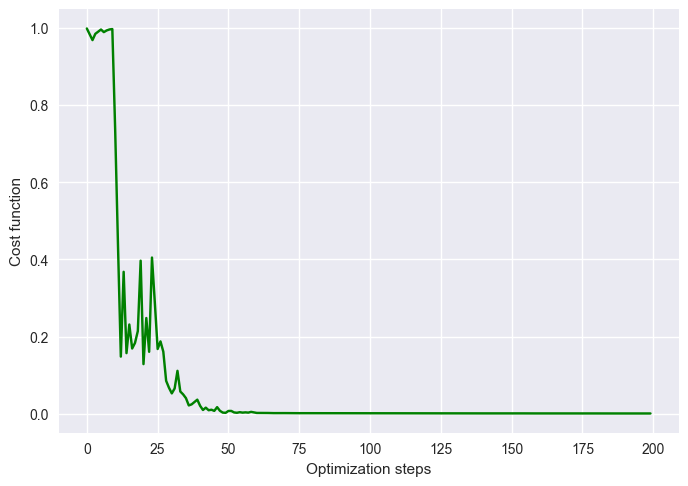

In [4]:
vqlssvmVectors: VQLSSVM = VQLSSVM(gamma, shots)
vqlssvmVectors.train(xTrain, yTrain, quantumSimulation=False, verbose=True, iterations = 200, method="COBYLA")
vqlssvmVectors.plotCost()

In [5]:
print(vqlssvmVectors.predict(xTest))

[ 0.0114+0.j  0.0345+0.j  0.0768+0.j -0.0623+0.j  0.0336+0.j  0.0497+0.j
 -0.062 +0.j  0.0248+0.j  0.0655+0.j -0.0689+0.j -0.071 +0.j  0.0585+0.j
  0.0291+0.j  0.0672+0.j  0.0579+0.j -0.0711+0.j  0.0583+0.j  0.0733+0.j
 -0.0694+0.j  0.0446+0.j -0.0692+0.j -0.0666+0.j  0.0682+0.j -0.0583+0.j
  0.0228+0.j -0.0703+0.j -0.0523+0.j  0.0276+0.j  0.0126+0.j -0.0691+0.j
 -0.085 +0.j  0.0683+0.j -0.0538+0.j  0.0408+0.j  0.0425+0.j  0.0439+0.j
 -0.0798+0.j -0.0671+0.j  0.0635+0.j -0.0674+0.j  0.046 +0.j  0.0579+0.j
 -0.0667+0.j -0.0606+0.j  0.0819+0.j  0.0603+0.j  0.0541+0.j  0.049 +0.j
  0.0735+0.j  0.049 +0.j  0.0623+0.j -0.058 +0.j  0.056 +0.j  0.0416+0.j
  0.0415+0.j  0.072 +0.j -0.0774+0.j -0.0675+0.j  0.0371+0.j -0.0638+0.j
 -0.0676+0.j  0.0767+0.j  0.0596+0.j  0.0431+0.j -0.0493+0.j  0.0332+0.j
 -0.058 +0.j -0.0702+0.j -0.0688+0.j  0.0367+0.j -0.0686+0.j -0.0734+0.j
  0.0362+0.j -0.0664+0.j -0.0581+0.j -0.0658+0.j -0.067 +0.j -0.0658+0.j
 -0.0769+0.j  0.0369+0.j -0.0578+0.j  0.053 +0.j -0

In [6]:
print("Accuracy:",vqlssvmVectors.accuracy(xTest, yTest))

Accuracy: 1.0


# VQLS-LSSVM quantum

In [7]:
vqlssvmQuantum: VQLSSVM = VQLSSVM(gamma, shots)
vqlssvmQuantum.train(xTrain, yTrain, quantumSimulation=True, verbose=True, iterations = 200)

vqlssvmQuantum.plotCost()

Condition number of the matrix:  1597.4885322547573
LS-SVM Matrix:
 [[  0.       1.       1.       1.       1.       1.       1.       1.    ]
 [  1.     100.6065  -0.9936  -0.7341   0.7206  -0.9257  -0.9182  -0.9391]
 [  1.      -0.9936 101.6948   1.2645  -1.146    1.5655   1.5419   1.6248]
 [  1.      -0.7341   1.2645 101.0524  -0.872    1.2361   1.1957   1.3444]
 [  1.       0.7206  -1.146   -0.872  100.9125  -1.1856  -1.0357  -1.2107]
 [  1.      -0.9257   1.5655   1.2361  -1.1856 101.774    1.3051   1.8947]
 [  1.      -0.9182   1.5419   1.1957  -1.0357   1.3051 101.522    1.3535]
 [  1.      -0.9391   1.6248   1.3444  -1.2107   1.8947   1.3535 102.072 ]]
['III', 'IIX', 'IIZ', 'IXI', 'IXX', 'IXZ', 'IYY', 'IZI', 'IZX', 'IZZ',
 'XII', 'XIX', 'XIZ', 'XXI', 'XXX', 'XXZ', 'XYY', 'XZI', 'XZX', 'XZZ',
 'YIY', 'YXY', 'YYI', 'YYX', 'YYZ', 'YZY', 'ZII', 'ZIX', 'ZIZ', 'ZXI',
 'ZXX', 'ZXZ', 'ZYY', 'ZZI', 'ZZX', 'ZZZ']
Pauli matrix coeffitients [(88.70429467711398+0j), (0.6081201544788775+0j),

In [ ]:
costCOBYLA = vqlssvmQuantum.getCostHistory()

with open('../SimulationResults/costCOBYLA.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(['Iteration', 'CostFunction'])
    for i in range(len(costCOBYLA)):
        writer.writerow([i, costCOBYLA[i]])


Cost history:
[0.9998461812936489, 0.9695236784647456, 0.9847470738887636, 0.9960148813983697, 0.9104827737095933, 0.9783373099781228, 0.8304781193496773, 0.9574785455360241, 0.9882201838703655, 0.8997430419803502, 0.41213042760113416, 0.5569222401903775, 0.43069824413911184, 0.36076182330558526, 0.33011340230735076, 0.4490251192880915, 0.18743494859434218, 0.2061830133170952, 0.17543625774117932, 0.4617753442406052, 0.16630278802570264, 0.14353238254885936, 0.10348081559296562, 0.1958302208020456, 0.08959185043630247, 0.01879389888443117, 0.11706415121808533, 0.023952014228303176, 0.07390513391409415, 0.026741124936132787, 0.04644890810151936, 0.022931959397974766, 0.03501777509592241, 0.019488246073753324, 0.019045428766382377, 0.026390364171184455, 0.023903299956961943, 0.024681061847144137, 0.024875546528871473, 0.025429210029597527, 0.020980354657614164, 0.021090576553077223, 0.01810043764047853, 0.02790347743784094, 0.02100143452803671, 0.017352280208556503, 0.020211917961872383,

In [ ]:
print("Predictions:\n", vqlssvmQuantum.predict(xTest))
print("Accuracy: ", vqlssvmQuantum.accuracy(xTest, yTest))

Predictions:
 [-0.0298+0.j -0.1039+0.j  0.0903+0.j -0.0784+0.j -0.0792+0.j  0.1092+0.j
 -0.0053+0.j  0.0594+0.j -0.0667+0.j -0.0068+0.j -0.0992+0.j -0.1414+0.j
  0.1482+0.j -0.0468+0.j -0.0009+0.j -0.1573+0.j  0.0287+0.j -0.1101+0.j
  0.0664+0.j  0.0966+0.j  0.0088+0.j -0.1188+0.j  0.0928+0.j  0.0327+0.j
 -0.0506+0.j  0.023 +0.j  0.0904+0.j  0.1615+0.j  0.1024+0.j -0.0083+0.j
 -0.1482+0.j  0.0484+0.j -0.1125+0.j -0.0087+0.j  0.037 +0.j -0.0841+0.j
  0.0856+0.j -0.0537+0.j -0.0559+0.j -0.0818+0.j -0.014 +0.j -0.0474+0.j
  0.0317+0.j -0.1205+0.j -0.0249+0.j  0.1597+0.j -0.0307+0.j  0.0307+0.j
 -0.0377+0.j -0.0057+0.j -0.0528+0.j  0.1388+0.j  0.0591+0.j  0.0604+0.j
 -0.0493+0.j  0.1137+0.j  0.0637+0.j -0.0931+0.j -0.0974+0.j -0.0325+0.j
 -0.2057+0.j  0.0821+0.j -0.1127+0.j -0.0316+0.j -0.0218+0.j  0.1663+0.j
  0.0869+0.j -0.0592+0.j -0.0517+0.j  0.0451+0.j  0.1779+0.j -0.0113+0.j
  0.0298+0.j -0.1083+0.j  0.1015+0.j  0.0218+0.j -0.1058+0.j  0.1343+0.j
 -0.0282+0.j -0.0419+0.j  0.0207+0.j 

# LSSVM (work in progresss)

In [ ]:
# lssvmMatrix1: np.ndarray = lssvmMatrix(xTrain, gamma, "linearKernel")
# yVector: np.array = prepareLabels(yTrain)
# print(yVector)
# print ("Condition number of the matrix: ", np.linalg.cond(lssvmMatrix1))
# print("LS-SVM Matrix:\n", lssvmMatrix1)
# print(yVector)

# solution: np.array = np.linalg.solve(lssvmMatrix1, yVector)
# print("Solution:", solution)
# print ("Norm of the solution: ",solution/np.linalg.norm(solution))

# bias: float = solution[0]
# weights: np.array = solution[1:]

# vqlssvmLSSVM: VQLSSVM = VQLSSVM(gamma,10)
# vqlssvmLSSVM.xTrain = xTrain
# vqlssvmLSSVM.xTrainSize = xTrain.shape[0]
# vqlssvmLSSVM.weights = weights
# vqlssvmLSSVM.b = bias
# predictions: np.array = vqlssvmLSSVM.predict(xTest)
# classVals = [vqlssvmLSSVM.assignClass(i) for i in predictions]
# print("Predictions:", predictions)
# print("Class values:", classVals)
# print("yTest:", yTest)
# # print(yTest)
# print("Accuracy:", vqlssvmLSSVM.accuracy(xTest, yTest))

# Classical SVM

In [ ]:
clf = SVC(kernel='linear')
clf.fit(xTrain, yTrain)
yPred = clf.predict(xTest)
print("Accuracy:", accuracy_score(yTest, yPred))

Accuracy: 1.0
